In [1]:
## Importinmg all the necessary libraries
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
from keras import regularizers, initializers
from keras.utils import np_utils
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# Importing the CIFAR dataset using Keras library
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [3]:
## Refining data
y_train = y_train.reshape(-1,)
x_train=x_train/255.0
y_test = y_test.reshape(-1,)
x_test=x_test/255.0

In [4]:
## Building the model with the necessary paramaters
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=5, activation="relu", input_shape=[32, 32, 3]))
model.add(Conv2D(filters=64, kernel_size=5, activation="relu"))
model.add(MaxPool2D((2,2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=384, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [5]:
## Adding Data Augmentation layers
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [6]:
# Compiling and Fitting the model
model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=64),validation_data=(x_test, y_test),epochs=30)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


782/782 [==============================] - 37s 34ms/step - loss: 1.6871 - accuracy: 0.3856 - val_loss: 1.3521 - val_accuracy: 0.5172
Epoch 2/30
782/782 [==============================] - 27s 35ms/step - loss: 1.4451 - accuracy: 0.4809 - val_loss: 1.1880 - val_accuracy: 0.5707
Epoch 3/30
782/782 [==============================] - 26s 33ms/step - loss: 1.3368 - accuracy: 0.5221 - val_loss: 1.1206 - val_accuracy: 0.5945
Epoch 4/30
782/782 [==============================] - 26s 34ms/step - loss: 1.2716 - accuracy: 0.5476 - val_loss: 1.0925 - val_accuracy: 0.6110
Epoch 5/30
782/782 [==============================] - 26s 34ms/step - loss: 1.2215 - accuracy: 0.5664 - val_loss: 1.0504 - val_accuracy: 0.6267
Epoch 6/30
782/782 [==============================] - 26s 33ms/step - loss: 1.1688 - accuracy: 0.5867 - val_loss: 0.9861 - val_accuracy: 0.6550
Epoch 7/30
782/782 [==============================] - 25s 33ms/step - loss: 1.1325 - accuracy: 0.5974 - val_loss: 0.9897 - val_accuracy: 0.6427
Epo

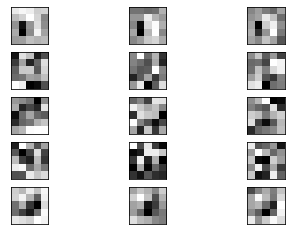

In [7]:
## Getting the weights of First Convolution layer
filters, biases = model.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 5, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

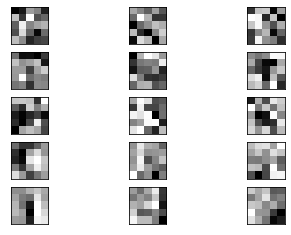

In [8]:
## Getting the weights of Second Convolution layer
filters, biases = model.layers[1].get_weights()


f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first five filters
n_filters, ix = 5, 1
for i in range(n_filters):
	f = filters[:, :, :, i]
	for j in range(3):
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
plt.show()

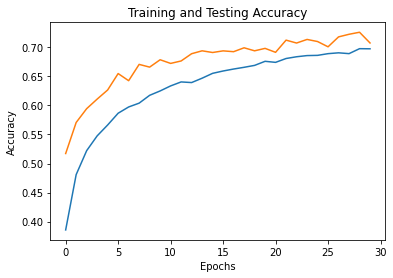

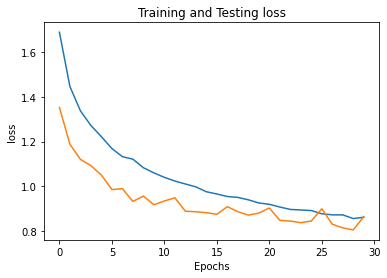

313/313 [==============================] - 1s 4ms/step - loss: 0.8657 - accuracy: 0.7077
Testing Accuracy:  70.77000141143799


In [9]:
# Plotting the Accuracy and losses 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()
loss1, test_accuracy = model.evaluate(x_test,y_test, batch_size=None)
print('Testing Accuracy: ',(test_accuracy*100))

In [10]:
# Converting to gray scale
def grayscale(data, dtype='float32'):
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    rst = np.expand_dims(rst, axis=3)
    return rst

x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)


In [11]:
# Building model with necessary paramters
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D((2,2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=384, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [13]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train_gray, y_train,batch_size=64),validation_data=(x_test_gray, y_test),epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


782/782 [==============================] - 17s 21ms/step - loss: 1.8618 - accuracy: 0.3253 - val_loss: 1.5901 - val_accuracy: 0.4235
Epoch 2/30
782/782 [==============================] - 16s 21ms/step - loss: 1.6313 - accuracy: 0.4173 - val_loss: 1.3964 - val_accuracy: 0.5013
Epoch 3/30
782/782 [==============================] - 17s 21ms/step - loss: 1.5183 - accuracy: 0.4616 - val_loss: 1.3361 - val_accuracy: 0.5283
Epoch 4/30
782/782 [==============================] - 16s 21ms/step - loss: 1.4380 - accuracy: 0.4942 - val_loss: 1.2750 - val_accuracy: 0.5553
Epoch 5/30
782/782 [==============================] - 16s 20ms/step - loss: 1.3838 - accuracy: 0.5136 - val_loss: 1.1921 - val_accuracy: 0.5797
Epoch 6/30
782/782 [==============================] - 17s 21ms/step - loss: 1.3344 - accuracy: 0.5322 - val_loss: 1.2293 - val_accuracy: 0.5815
Epoch 7/30
782/782 [==============================] - 16s 21ms/step - loss: 1.3045 - accuracy: 0.5418 - val_loss: 1.0472 - val_accuracy: 0.6303
Epo

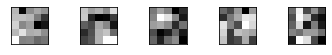

In [14]:
# Getting weights of first convolution layer and plotting the first five filters
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 5, 1
for i in range(n_filters):
	f = filters[:, :, :, i]
	for j in range(1):
		ax = plt.subplot(n_filters, 5, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
plt.show()

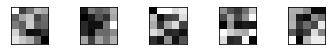

In [15]:
# Getting weights of second convolution layer and plotting the first five filters
filters, biases = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 5, 1
for i in range(n_filters):
	f = filters[:, :, :, i]
	for j in range(1):
		ax = plt.subplot(n_filters, 5, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
plt.show()

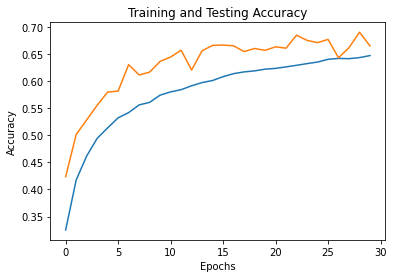

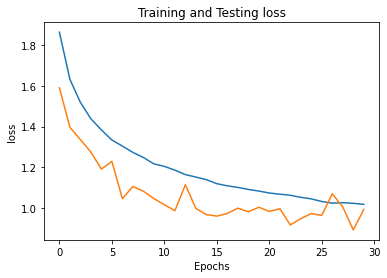

313/313 [==============================] - 2s 5ms/step - loss: 0.9945 - accuracy: 0.6649
Test accuracy= 66.4900004863739


In [17]:
# Plotting the Training and Testing Accuracy and losses.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()
loss_gray, test_accuracy_gray = model.evaluate(x_test_gray,y_test, batch_size=None)
print('Test accuracy=',(test_accuracy_gray*100))